# **Project Proposal:** A start to computational annotation of a lipid mass map<br/>


**Background and Rationale:** Enumeration of plant lipid molecular species and comparison of lipids across the plant kingdom would facilitate identification of the function of genes involved in lipid metabolism and lipid signaling. Recent innovations in the speed of data acquisition by mass spectrometry provide an opportunity to assemble untargeted mass spectral data for systematic, comprehensive lipidome annotation and lipid discovery. The lipid data are intensities, each associated with a pair of mass/charge (m/z) values, one for the intact lipid and one for a lipid fragment ion. Some of the fragments represent lipid building blocks, such as fatty acids. Since many lipids, for example, glycerolipids, are composed of a finite number of building blocks, arranged in different combinations, a computational approach considering all or a subset of possible combinations of the lipid components can be used to annotate untargeted lipid mass spectrometry data.  
<br/>

**Objective of the code:** The objective of the project is to create a database containing common glycerophospholipid components and combine all components (fatty acids, glycerol, and phospholipid head groups) in all ways that are biochemically feasible. The results will be plotted as a scatter plot of intact phosphoglycerolipid ion m/z vs phosphoglycerolipid fatty acid fragment ion m/z.  The idea is that, in the long-term, the computationally generated scatter plot will be an overlay to a “heat map”-type array of experimental intensity data on an intact ion-fragment m/z grid, providing candidate annotation for the experimentally measured lipids.
<br/>


**Sketch:** <br/>
<img src="sketch.jpg" alt="sketch_image" width="1000"/>
<br/>

**References:**<br/>There are some papers where intact ion masses and fragments are generated, such as these:<br/>
Foster JM, Moreno P, Fabregat A, Hermjakob H, Steinbeck C, et al. (2013) LipidHome: A database of theoretical lipids optimized for high throughput mass spectrometry lipidomics. PLoS ONE 8(5): e61951. doi:10.1371/journal.pone.0061951
<br/>
Witting M, Ruttkies C, Neumann S, Schmitt-Kopplin P (2017) LipidFrag: Improving reliability of in silico fragmentation of lipids and application to the Caenorhabditis elegans lipidome. PLoS ONE 12(3): e0172311. doi:10.1371/journal.pone.0172311

In [1]:
import glob
import os
os.chdir("/Users/Ruth/Dropbox/coding/Project2/")
print(glob.os.listdir())

#dataset_dir = '/Users/Ruth/Dropbox/coding/Project2/'

import csv

#Open the csv files containg lists of head group and fatty acids masses
with open("annotation input1s.csv") as h:
    contents_of_h = csv.reader(h)
    head_groups = []
    for each_line in contents_of_h:
        head_groups += each_line
print(head_groups)
with open("annotation input2s.csv") as f:
    contents_of_f = csv.reader(f)
    fatty_acids = []
    for each_line in contents_of_f:
        fatty_acids += each_line
print(fatty_acids)


['.git', '.ipynb_checkpoints', 'annotation input1s.csv', 'annotation input2s.csv', 'projectproposal.ipynb', 'projectproposal.md', 'README.md', 'sketch.jpg', 'try3.ipynb']
['705.2453', '765.2664', '543.1925', '603.2136', '381.1397', '441.1608', '219.0869', '279.108', '137.0003', '208.0739', '282.1107', '180.0426', '211.0371', '299.0532', '224.0324', '283.0488', '202.0836', '262.1047']
['249.18546', '251.20116', '253.21676', '255.23246', '263.16476', '263.20116', '265.18036', '269.21166', '269.24806', '271.22736', '275.20106', '277.14396', '277.21676', '279.15966', '279.23246', '281.17526', '281.24806', '283.26376', '285.20656', '289.18036', '291.19606', '291.23246', '293.13886', '293.21166', '293.24806', '295.15456', '295.19096', '295.22736', '295.26376']


In [2]:
#Make the strings into floats
head_groups_fl = []
for x in head_groups:
    head_groups_fl.append(float(x))
print(head_groups_fl)
fatty_acids_fl = []
for y in fatty_acids:
    fatty_acids_fl.append(float(y))
print(fatty_acids_fl)


[705.2453, 765.2664, 543.1925, 603.2136, 381.1397, 441.1608, 219.0869, 279.108, 137.0003, 208.0739, 282.1107, 180.0426, 211.0371, 299.0532, 224.0324, 283.0488, 202.0836, 262.1047]
[249.18546, 251.20116, 253.21676, 255.23246, 263.16476, 263.20116, 265.18036, 269.21166, 269.24806, 271.22736, 275.20106, 277.14396, 277.21676, 279.15966, 279.23246, 281.17526, 281.24806, 283.26376, 285.20656, 289.18036, 291.19606, 291.23246, 293.13886, 293.21166, 293.24806, 295.15456, 295.19096, 295.22736, 295.26376]


In [3]:
#Create a list of lists, where the small lists are x,y pairs of intact ion m/z, fatty acid m/z.  I added 0.00054 to the total of the intact ion
#mass to cover the electron mass.
results = []
for a in head_groups_fl:
    for b in fatty_acids_fl:
        for c in fatty_acids_fl:
            results.append([a + b + c + 0.00054, c])
print(results)

[[1203.61676, 249.18546], [1205.63246, 251.20116], [1207.64806, 253.21676], [1209.6637600000001, 255.23246], [1217.59606, 263.16476], [1217.63246, 263.20116], [1219.61166, 265.18036], [1223.6429600000001, 269.21166], [1223.67936, 269.24806], [1225.65866, 271.22736], [1229.63236, 275.20106], [1231.57526, 277.14396], [1231.64806, 277.21676], [1233.59096, 279.15966], [1233.6637600000001, 279.23246], [1235.6065600000002, 281.17526], [1235.67936, 281.24806], [1237.69506, 283.26376], [1239.63786, 285.20656], [1243.61166, 289.18036], [1245.62736, 291.19606], [1245.6637600000001, 291.23246], [1247.5701600000002, 293.13886], [1247.6429600000001, 293.21166], [1247.67936, 293.24806], [1249.5858600000001, 295.15456], [1249.62226, 295.19096], [1249.65866, 295.22736], [1249.69506, 295.26376], [1205.63246, 249.18546], [1207.64816, 251.20116], [1209.66376, 253.21676], [1211.67946, 255.23246], [1219.61176, 263.16476], [1219.64816, 263.20116], [1221.62736, 265.18036], [1225.65866, 269.21166], [1225.6950

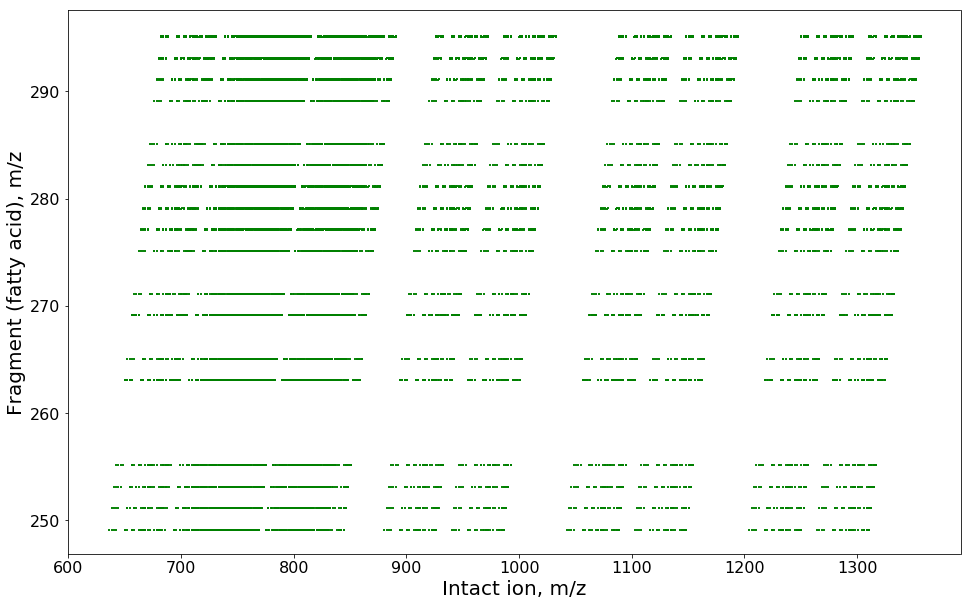

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10)) 
plt.scatter(*zip(*results), 
            s=1, 
            marker='s', 
            facecolors='g', 
            edgecolors='g')
plt.ylabel("Fragment (fatty acid), m/z", fontsize=20)
plt.xlabel("Intact ion, m/z", fontsize=20)
plt.rcParams['ytick.labelsize'] = 16.0
plt.rcParams['xtick.labelsize'] = 16.0
plt.show()


In [6]:
#I'm trying to save the figure but it's saving an empty file.
plt.savefig('first_try_at_fig.jpg') 

<Figure size 432x288 with 0 Axes>

# **ROAD BLOCKS<br/>

**1:** I don't feel that my "list of lists" data structure is optimal.  I would like to be able to read in a csv file with additional information, such as the names of the head groups and fatty acids, in addition to their masses.  But I didn't really know how to do this.
<br/>

**2.** I can't read in my whole list of fatty acids.  I used 29 of my list of 100 fatty acids. When I tried to do the whole list, I got an error that said I need to change the IO rate (not sure if that was exactly what it said?) to get it to work. <br/>

**3.** I haven't figured out how to output the data in a csv file yet. But the output would be much better if I could get the data labelled. <br/>

**3.** Also I'm not sure why my savefig command is saving an empty file.  I remember this happened to me on the water cooling figure, but I don't remember how I got it working. <br/>
